
🔹 Melhor combinação GridSearchCV: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
🔹 Acurácia: 0.7989
🔹 Precisão: 0.7969
🔹 Recall: 0.6892
🔹 F1-Score: 0.7391


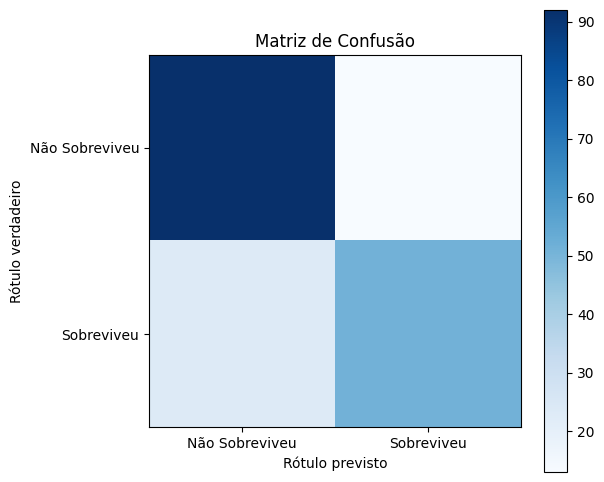


🔹 Melhor combinação RandomizedSearchCV: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 12}
🔹 Acurácia: 0.7989
🔹 Precisão: 0.7969
🔹 Recall: 0.6892
🔹 F1-Score: 0.7391


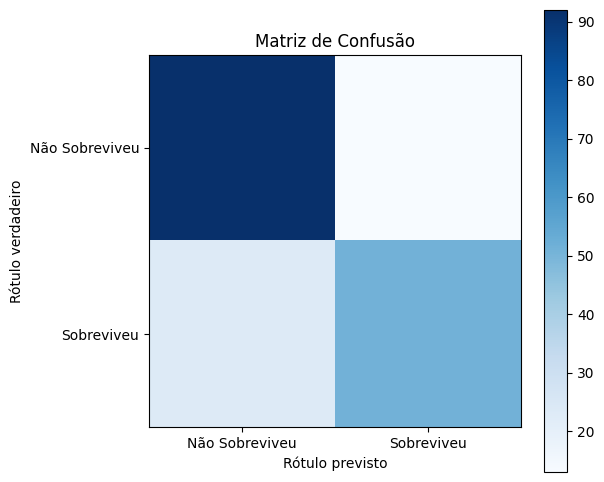


🔹 Melhor combinação BayesSearchCV: OrderedDict({'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 11})
🔹 Acurácia: 0.7933
🔹 Precisão: 0.7846
🔹 Recall: 0.6892
🔹 F1-Score: 0.7338


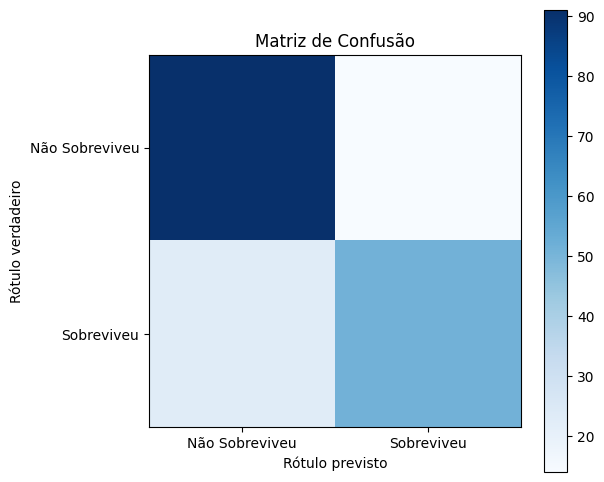

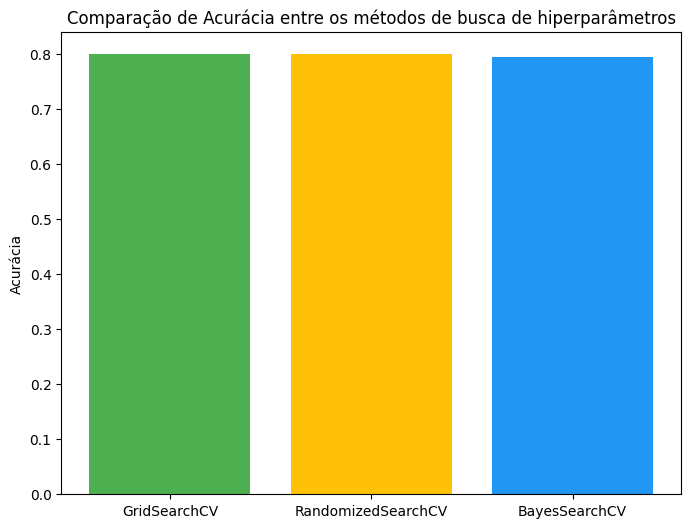

In [3]:
# Importação das bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from skopt import BayesSearchCV
from scipy.stats import randint

# 1. Leitura dos Dados
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 2. Pré-processamento dos Dados
train_df.loc[:, "Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df.loc[:, "Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df.loc[:, "Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
train_df.loc[:, "Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

# Conversão de variáveis categóricas
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping)
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping)

# Seleção de variáveis
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

# Divisão do conjunto de treino para validação interna
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Função para calcular e exibir métricas
def print_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"🔹 Acurácia: {acc:.4f}")
    print(f"🔹 Precisão: {precision:.4f}")
    print(f"🔹 Recall: {recall:.4f}")
    print(f"🔹 F1-Score: {f1:.4f}")
    

    # Visualização da matriz de confusão
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
    plt.yticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
    plt.ylabel('Rótulo verdadeiro')
    plt.xlabel('Rótulo previsto')
    plt.show()


# 🔹 Definição dos hiperparâmetros para GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10]
}

# Inicializando o GridSearch
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_grid = grid_search.best_estimator_
y_pred_grid = best_grid.predict(X_val)

# Resultados do GridSearchCV
print("\n🔹 Melhor combinação GridSearchCV:", grid_search.best_params_)
print_metrics(y_val, y_pred_grid)


# 🔹 Definição dos hiperparâmetros para RandomizedSearchCV
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20)
}

# Inicializando o RandomizedSearch
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_random = random_search.best_estimator_
y_pred_random = best_random.predict(X_val)

# Resultados do RandomizedSearchCV
print("\n🔹 Melhor combinação RandomizedSearchCV:", random_search.best_params_)
print_metrics(y_val, y_pred_random)


# 🔹 Definição dos hiperparâmetros para BayesSearchCV
param_bayes = {
    "criterion": ["gini", "entropy"],
    "max_depth": (3, 10),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 20)
}

# Inicializando o BayesSearch
bayes_search = BayesSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_bayes,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
bayes_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_bayes = bayes_search.best_estimator_
y_pred_bayes = best_bayes.predict(X_val)

# Resultados do BayesSearchCV
print("\n🔹 Melhor combinação BayesSearchCV:", bayes_search.best_params_)
print_metrics(y_val, y_pred_bayes)


# 🔥 Comparação final entre os três métodos
models = ["GridSearchCV", "RandomizedSearchCV", "BayesSearchCV"]
accuracies = [
    accuracy_score(y_val, y_pred_grid),
    accuracy_score(y_val, y_pred_random),
    accuracy_score(y_val, y_pred_bayes),
]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=["#4CAF50", "#FFC107", "#2196F3"])
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia entre os métodos de busca de hiperparâmetros")
plt.show()
